# Some intuitions for SVMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

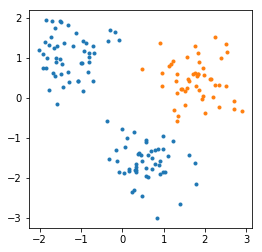

In [105]:
class Const():
    nclasses = 3       # number of classes
    npoints = 50       # Points in each class
    sigma = 0.5        # spread of each class

c = Const()

np.random.seed(0)

x = np.zeros(shape=(c.nclasses*c.npoints,2))
y = np.zeros(shape=(c.nclasses*c.npoints)).astype(int)
for i in range(c.nclasses): # diff classes
    mu = np.random.normal(size=(1,2))
    x[(i*c.npoints):((i+1)*c.npoints),:] = np.random.normal(size=(c.npoints,2))*c.sigma + mu
    if i==0:
        y[(i*c.npoints):((i+1)*c.npoints)] = 1 # Only one is marked as true
    else:
        y[(i*c.npoints):((i+1)*c.npoints)] = 0
    
def nicepic(x,y):
    plt.figure(figsize=(4,4));
    ax = plt.axes()
    for i in np.unique(y):
        g = (y==i)
        ax.plot(x[g,0],x[g,1],'.');
    return ax
        
nicepic(x,y);

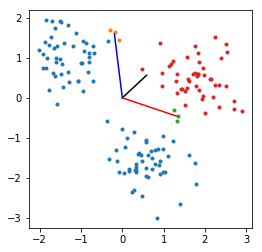

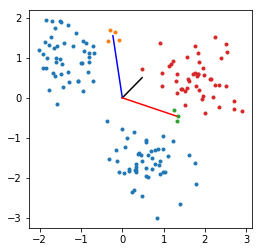

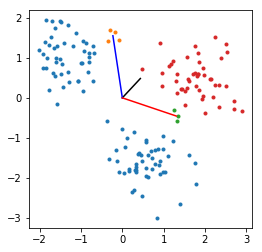

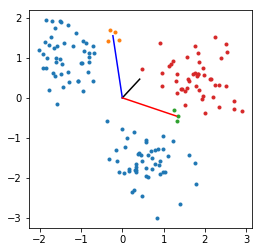

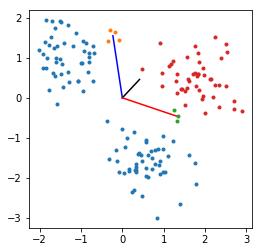

In [110]:
def throwline(ax,v,color='k'):
    """Gets normal vector, draws a line."""
    x = np.array(plt.xlim())
    y = np.array(plt.ylim())
    plt.plot([0,v[0]],[0,v[1]],color+'-');
    
# Optimize
v = np.array([0,1])
alpha = 0.2
c.n_iter = 10
c.step = 2
history = np.zeros(c.n_iter)
for t in range(c.n_iter):
    classified = np.matmul(x,v)
    g = classified>np.linalg.norm(v)**2
    if t % c.step == 1:
        ax = nicepic(x,g+y*2) # To show both classes and misclassification
        throwline(ax,v)
    
    gp = np.logical_and(g,y==0)                 # False-positives
    gn = np.logical_and(np.logical_not(g),y==1) # False-negatives
    if np.sum(gp)>0:
        fp = np.mean(x[gp,:],axis=0)
    else:
        fp = np.array([0,0])
    if np.sum(gn)>0:
        fn = np.mean(x[gn,:],axis=0)
    else:
        fn = np.array([0,0])
        
    history[t] = np.sum(gp) + np.sum(gn)
    if t % c.step == 1:
        throwline(ax,fp,'b')
        throwline(ax,fn,'r')
    v = v*(1-alpha) + (fn-fp)*alpha

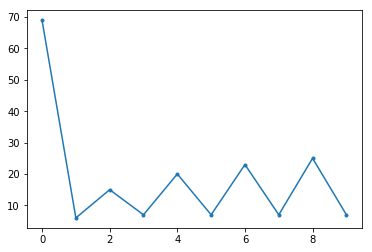

In [111]:
plt.plot(history,'.-');

Oscillations. So it almost finds the solution, then tortures itself by not being able to decide which points to include, and which to give up on. Changes it's mind at each iteration.

The same thing happens with lower learning rates, just later, and somehow with even higher amplitude.